<a href="https://colab.research.google.com/github/YagyanshB/ml-models-understanding/blob/main/time_series_forecasting_with_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

import warnings;
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time Date  1080 non-null   int64  
 1   Product    1080 non-null   int64  
 2   Store      1080 non-null   object 
 3   Value      1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB


In [7]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [10]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [11]:
df.dtypes

,0
Time Date,int64
Product,int64
Store,object
Value,float64


In [12]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [13]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [16]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis = 1, inplace = True)
df.columns = ['y', 'ds']

In [17]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [18]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [19]:
future = m.make_future_dataframe(periods = 100, freq = 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.770856,905.676217,4040.605282,3041.770856,3041.770856,-640.518361,-640.518361,-640.518361,468.866955,...,16.599228,16.599228,16.599228,-1125.984544,-1125.984544,-1125.984544,0.0,0.0,0.0,2401.252495
1,2018-01-02,3042.521331,769.890787,3891.743554,3042.521331,3042.521331,-650.769323,-650.769323,-650.769323,468.866955,...,-11.296417,-11.296417,-11.296417,-1108.339861,-1108.339861,-1108.339861,0.0,0.0,0.0,2391.752007
2,2018-01-03,3043.271805,819.183937,3968.320282,3043.271805,3043.271805,-625.064666,-625.064666,-625.064666,468.866955,...,-4.417827,-4.417827,-4.417827,-1089.513794,-1089.513794,-1089.513794,0.0,0.0,0.0,2418.207139
3,2018-01-04,3044.022280,821.610420,4098.999367,3044.022280,3044.022280,-578.235921,-578.235921,-578.235921,468.866955,...,22.478009,22.478009,22.478009,-1069.580885,-1069.580885,-1069.580885,0.0,0.0,0.0,2465.786360
4,2018-01-05,3044.772755,804.864312,4008.766958,3044.772755,3044.772755,-614.373261,-614.373261,-614.373261,468.866955,...,-34.571830,-34.571830,-34.571830,-1048.668386,-1048.668386,-1048.668386,0.0,0.0,0.0,2430.399494


In [20]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2401.252495
1,2018-01-02,2391.752007
2,2018-01-03,2418.207139
3,2018-01-04,2465.786360
4,2018-01-05,2430.399494
...,...,...
1175,2021-03-22,3722.674925
1176,2021-03-23,3706.287572
1177,2021-03-24,3721.897613
1178,2021-03-25,3754.165330


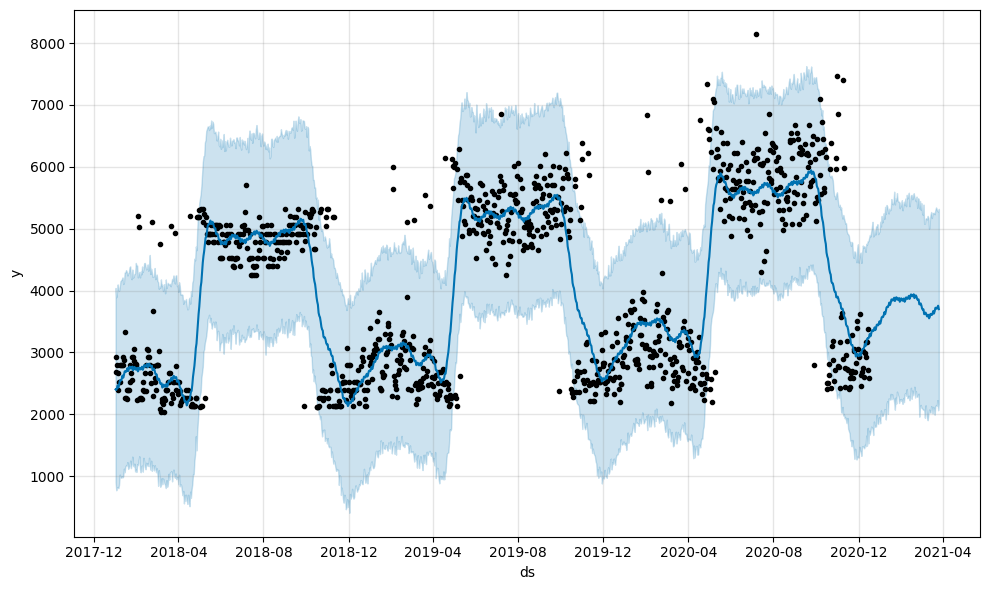

In [21]:
plot1 = m.plot(forecast)

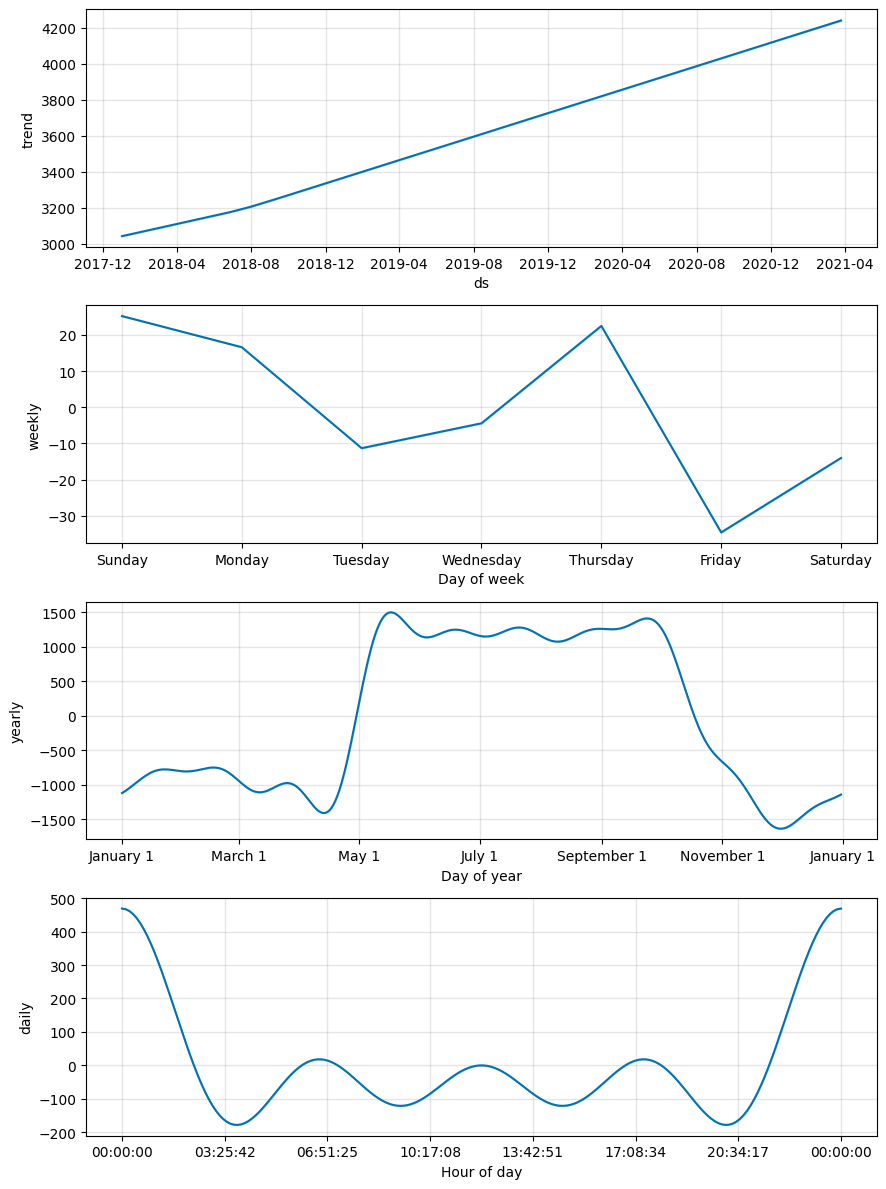

In [22]:
plot2 = m.plot_components(forecast)